Here I use a different dataset for basket analysis. 

The aim of the analysis is to understand the lift of one category to another

In a promotion event, we can specifically separate one category into promo_category and non_promo_category. So we can quantify the effect of promotions of one category in calculating the lift to another category

An example code from Kaggle: https://www.kaggle.com/roshansharma/market-basket-analysis

https://github.com/jordanbean/bakery-strategy/blob/master/bakery_strategy.ipynb


In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# for market basket analysis
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('basket/Market_Basket_data.csv', header = None)

In [60]:
max_rows , max_quantity = data.shape

In [61]:
data.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

# Visualizations

In [68]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

food.head()

0          1           2                 3             4  \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                  5     6               7             8             9  ...  \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice  ...   
1               NaN   NaN             NaN           NaN           NaN  ...   
2               NaN   NaN             NaN           NaN           NaN  ...   
3               NaN   NaN             NaN           NaN           NaN  ...   
4               NaN   NaN             NaN           NaN           NaN  ...   

          11     12     13             14      15                 16  \
0  green tea  honey  salad  mineral water  salmon  antioxydant juice   
1        NaN    NaN    NaN            NaN     NaN                NaN   
2        NaN    NaN    NaN            NaN     NaN                NaN   
3        NaN    NaN    NaN            NaN     NaN                NaN   
4        NaN    NaN    NaN            NaN     NaN                NaN   

                17       18         19  food  
0  frozen smoothie  spinach  olive oil  Food  
1              NaN      NaN        NaN  Food  
2              NaN      NaN        NaN  Food  
3              NaN      NaN        NaN  Food  
4              NaN      NaN        NaN  Food  

[5 rows x 21 columns]

In [69]:
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

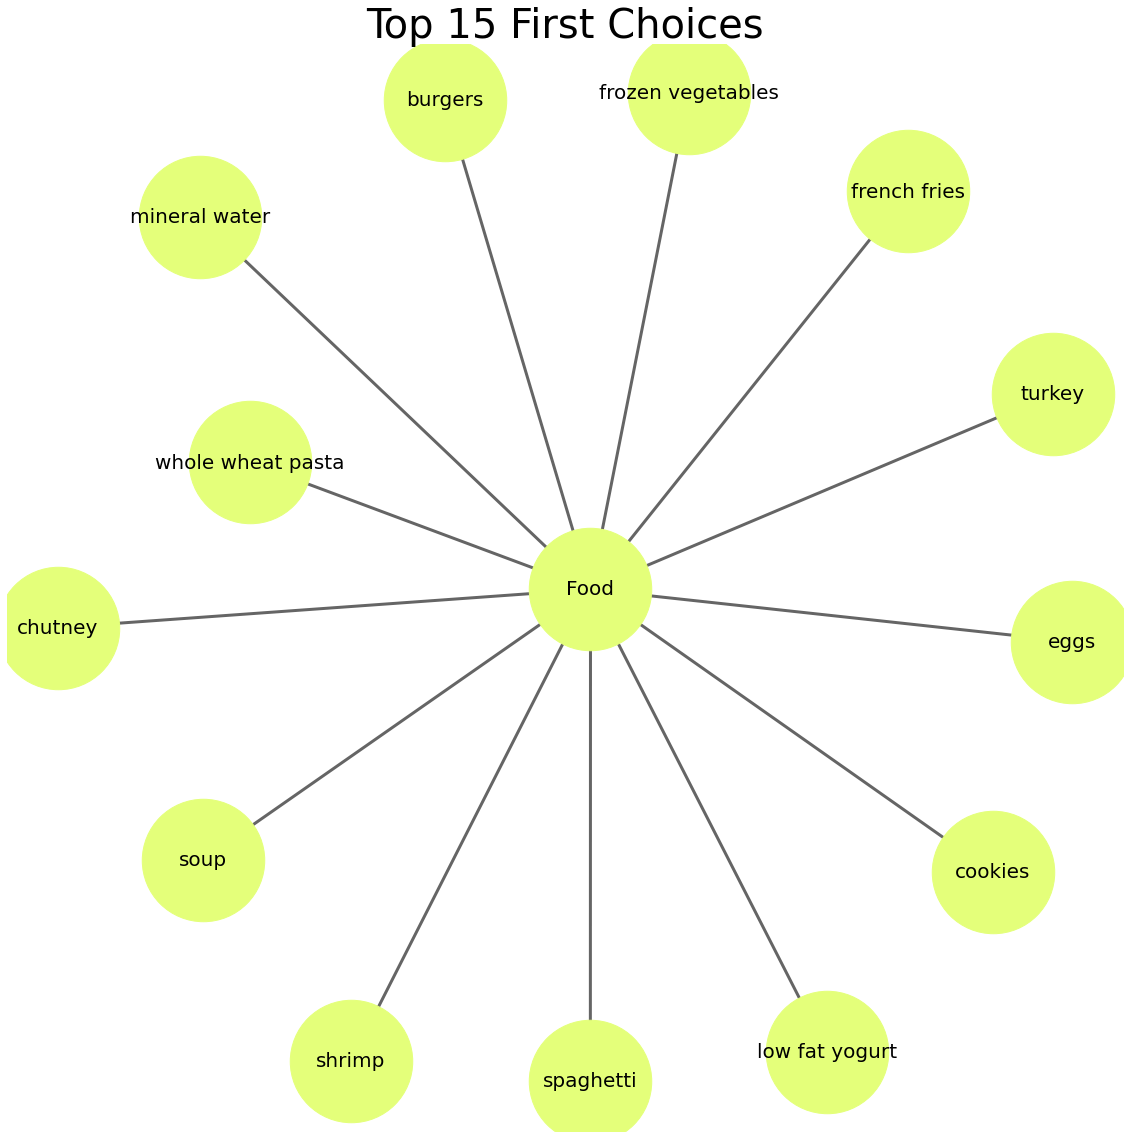

In [70]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [71]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)


In [72]:
data

0                  1            2                 3  \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                 4                 5     6               7             8  \
0     green grapes  whole weat flour  yams  cottage cheese  energy drink   
1              NaN               NaN   NaN             NaN           NaN   
2              NaN               NaN   NaN             NaN           NaN   
3              NaN               NaN   NaN             NaN           NaN   
4        green tea               NaN   NaN             NaN           NaN   
...            ...               ...   ...             ...           ...   
7496           NaN               NaN   NaN             NaN           NaN   
7497     magazines         green tea   NaN             NaN           NaN   
7498           NaN               NaN   NaN             NaN           NaN   
7499           NaN               NaN   NaN             NaN           NaN   
7500           NaN               NaN   NaN             NaN           NaN   

                 9  ...     12     13             14      15  \
0     tomato juice  ...  honey  salad  mineral water  salmon   
1              NaN  ...    NaN    NaN            NaN     NaN   
2              NaN  ...    NaN    NaN            NaN     NaN   
3              NaN  ...    NaN    NaN            NaN     NaN   
4              NaN  ...    NaN    NaN            NaN     NaN   
...            ...  ...    ...    ...            ...     ...   
7496           NaN  ...    NaN    NaN            NaN     NaN   
7497           NaN  ...    NaN    NaN            NaN     NaN   
7498           NaN  ...    NaN    NaN            NaN     NaN   
7499           NaN  ...    NaN    NaN            NaN     NaN   
7500           NaN  ...    NaN    NaN            NaN     NaN   

                     16               17       18         19  food  \
0     antioxydant juice  frozen smoothie  spinach  olive oil  Food   
1                   NaN              NaN      NaN        NaN  Food   
2                   NaN              NaN      NaN        NaN  Food   
3                   NaN              NaN      NaN        NaN  Food   
4                   NaN              NaN      NaN        NaN  Food   
...                 ...              ...      ...        ...   ...   
7496                NaN              NaN      NaN        NaN  Food   
7497                NaN              NaN      NaN        NaN  Food   
7498                NaN              NaN      NaN        NaN  Food   
7499                NaN              NaN      NaN        NaN  Food   
7500                NaN              NaN      NaN        NaN  Food   

       secondchoice  
0     Second Choice  
1     Second Choice  
2     Second Choice  
3     Second Choice  
4     Second Choice  
...             ...  
7496  Second Choice  
7497  Second Choice  
7498  Second Choice  
7499  Second Choice  
7500  Second Choice  

[7501 rows x 22 columns]

In [73]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)


# Preprocessing

In [74]:
# making each customers shopping items an identical list
trans = []
for i in range(0, max_rows):
    trans.append([str(data.values[i,j]) for j in range(0, max_quantity)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)


(7501, 20)


# Use Encoder

In [75]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

In [76]:
data.head()

asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False              True              False   
1        False       False             False              False   
2        False       False             False              False   
3        False       False             False              False   
4        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False   True        False     False  
1             False  False        False     False  
2             False  False        False     False  
3             False  False        False     False  
4              True  False        False     False  

[5 rows x 121 columns]

In [82]:
def find_top_n(data, n =50):
    """Find top n items
    Exclude first data becasue it is nan
    """
    return data.sum().sort_values(ascending=False)[1:n+1].keys()

In [83]:
top_50 = find_top_n(data)

In [84]:
# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, top_50]

# checking the shape
data.shape

(7501, 50)

In [86]:
data.head()

mineral water   eggs  spaghetti  french fries  chocolate  green tea   milk  \
0           True  False      False         False      False       True  False   
1          False   True      False         False      False      False  False   
2          False  False      False         False      False      False  False   
3          False  False      False         False      False      False  False   
4           True  False      False         False      False       True   True   

   ground beef  frozen vegetables  pancakes  ...  energy bar  energy drink  \
0        False              False     False  ...       False          True   
1        False              False     False  ...       False         False   
2        False              False     False  ...       False         False   
3        False              False     False  ...       False         False   
4        False              False     False  ...        True         False   

   pepper    ham  vegetables mix  cereals  muffins    oil  french wine  \
0   False  False            True    False    False  False        False   
1   False  False           False    False    False  False        False   
2   False  False           False    False    False  False        False   
3   False  False           False    False    False  False        False   
4   False  False           False    False    False  False        False   

   fresh tuna  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 50 columns]

# Applying Apriori

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#metrics

Measure 1: Support. This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {mineral water} is 23%. Itemsets can also contain multiple items. For instance, the support of {spaghetti, chocolate, milk} is 1%.

Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In below example, the confidence of {soup, milk} is 30%, meaning that 30% of the time, milk is in the basket when soup is purchased. 

Measure 3: Lift. This says how likely item Y is purchased when item X is purchased compare to customers only purchase X, while controlling for how popular item Y is. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought. In example below, the lift of {ground beef -> spaghetti} is 2.29, which implies customers are 2x more likely to buy spaghetti when they purchase beef.

In [136]:
#Now, let us return the items and itemsets with at least 1% support:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

support         itemsets  length
0  0.238368  (mineral water)       1
1  0.179709           (eggs)       1
2  0.174110      (spaghetti)       1
3  0.170911   (french fries)       1
4  0.163845      (chocolate)       1

In [139]:
# focus only on 2 items being purchased together
frequent_itemsets = frequent_itemsets[frequent_itemsets['length']<3]

In [287]:
association = association_rules(frequent_itemsets, metric ='lift', min_threshold= 1.5)
association.head()

antecedents          consequents  antecedent support  \
0  (mineral water)               (milk)            0.238368   
1           (milk)      (mineral water)            0.129583   
2  (mineral water)        (ground beef)            0.238368   
3    (ground beef)      (mineral water)            0.098254   
4  (mineral water)  (frozen vegetables)            0.238368   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.129583  0.047994    0.201342  1.553774  0.017105    1.089850  
1            0.238368  0.047994    0.370370  1.553774  0.017105    1.209650  
2            0.098254  0.040928    0.171700  1.747522  0.017507    1.088672  
3            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401  
4            0.095321  0.035729    0.149888  1.572463  0.013007    1.064189

In [289]:
def change_to_set(row):
    l = [list(x) for x in row]
    return l

In [290]:
association['antecedents'] = change_to_set(association['antecedents'])
association['antecedents'] = association['antecedents'].apply(lambda x: ''.join(x))
association['consequents'] = change_to_set(association['consequents'])
association['consequents'] = association['consequents'].apply(lambda x: ''.join(x))
association

antecedents        consequents  antecedent support  consequent support  \
0    mineral water               milk            0.238368            0.129583   
1             milk      mineral water            0.129583            0.238368   
2    mineral water        ground beef            0.238368            0.098254   
3      ground beef      mineral water            0.098254            0.238368   
4    mineral water  frozen vegetables            0.238368            0.095321   
..             ...                ...                 ...                 ...   
117           cake            burgers            0.081056            0.087188   
118        burgers             turkey            0.087188            0.062525   
119         turkey            burgers            0.062525            0.087188   
120         shrimp           tomatoes            0.071457            0.068391   
121       tomatoes             shrimp            0.068391            0.071457   

      support  confidence      lift  leverage  conviction  
0    0.047994    0.201342  1.553774  0.017105    1.089850  
1    0.047994    0.370370  1.553774  0.017105    1.209650  
2    0.040928    0.171700  1.747522  0.017507    1.088672  
3    0.040928    0.416554  1.747522  0.017507    1.305401  
4    0.035729    0.149888  1.572463  0.013007    1.064189  
..        ...         ...       ...       ...         ...  
117  0.011465    0.141447  1.622319  0.004398    1.063198  
118  0.010665    0.122324  1.956404  0.005214    1.068134  
119  0.010665    0.170576  1.956404  0.005214    1.100536  
120  0.011199    0.156716  2.291481  0.006311    1.104740  
121  0.011199    0.163743  2.291481  0.006311    1.110355  

[122 rows x 9 columns]

In [291]:
# assuming milk is on promotion
association.loc[association['antecedents'] =='milk']

antecedents        consequents  antecedent support  consequent support  \
1         milk      mineral water            0.129583            0.238368   
25        milk          spaghetti            0.129583            0.174110   
55        milk          chocolate            0.129583            0.163845   
69        milk        ground beef            0.129583            0.098254   
71        milk  frozen vegetables            0.129583            0.095321   
73        milk            burgers            0.129583            0.087188   
75        milk             shrimp            0.129583            0.071457   
77        milk           tomatoes            0.129583            0.068391   
79        milk          olive oil            0.129583            0.065858   
81        milk    frozen smoothie            0.129583            0.063325   
83        milk            chicken            0.129583            0.059992   
85        milk   whole wheat rice            0.129583            0.058526   
87        milk        cooking oil            0.129583            0.051060   
89        milk               soup            0.129583            0.050527   

     support  confidence      lift  leverage  conviction  
1   0.047994    0.370370  1.553774  0.017105    1.209650  
25  0.035462    0.273663  1.571779  0.012900    1.137061  
55  0.032129    0.247942  1.513276  0.010898    1.111823  
69  0.021997    0.169753  1.727704  0.009265    1.086118  
71  0.023597    0.182099  1.910382  0.011245    1.106099  
73  0.017864    0.137860  1.581175  0.006566    1.058774  
75  0.017598    0.135802  1.900474  0.008338    1.074457  
77  0.013998    0.108025  1.579519  0.005136    1.044434  
79  0.017064    0.131687  1.999567  0.008530    1.075813  
81  0.014265    0.110082  1.738373  0.006059    1.052541  
83  0.014798    0.114198  1.903546  0.007024    1.061194  
85  0.011865    0.091564  1.564510  0.004281    1.036368  
87  0.011465    0.088477  1.732817  0.004849    1.041049  
89  0.015198    0.117284  2.321232  0.008651    1.075627